<a href="https://colab.research.google.com/github/shryu8902/KIRD_AUTOML/blob/main/KIRD_Day_2_2_NN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 딥러닝 with torch
pytorch는 python을 위한 오픈소스 딥러닝 라이브러리입니다.
pytorch 라이브러리에서 구현된 다양한 모듈들을 활용하여 당뇨(diabetes)데이터에 대한 딥러닝 실습을 진행해보도록 하겠습니다.

## 1. 기본 torch 코드
다음은 pytorch로 신경망을 구성하고 학습하는 과정에 대한 가장 기초적인 코드입니다.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# torch 활용을 위한 기본 라이브러리
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
# 데이터셋 관련 외부 라이브러리 사용
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# 당뇨 데이터셋 불러오기
# 컬럼 및 데이터셋 구성정보 확인
raw_data = load_diabetes()
print(raw_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
# 데이터프레임 변환
data_df = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)

# 타겟 변수 추가
data_df['target'] = raw_data.target

In [10]:
data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
data_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [12]:
# 입력 특성과 타겟 변수 나누기
X = raw_data.data
y = raw_data.target

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#훈련, 테스트 데이터셋 구성
train_dataset = TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.float32))

#데이터 로더 구성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# 데이터 로더의 역할은?
# 데이터셋을 분할하며 학습을 위한 미니배치 생성

In [13]:
# 모델 정의하기.
# Sequential을 통한 순차적 신경망 모델 구성
model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

In [16]:
# 학습 루프 작성하기
# 학습 과정에서 필요한 것은?
# 1. 모델 평가를 위한 손실함수
# 2. 모델의 파라미터 업데이트를 위한 optimizer
# 3. forward path를 통한 성능평가
# 4. backward path를 통한 경사하강법 적용
# 5. 반복
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50

epoch_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad() # 기울기 초기화
        outputs = model(inputs) # 출력값 확보
        loss = loss_fn(outputs, targets.unsqueeze(1))
        loss.backward() # backpropagation
        optimizer.step() # gradient descent
        # ... (add logging or validation if needed) ...
        epoch_loss += loss.item()
    average_loss = epoch_loss / len(train_loader)
    epoch_losses.append(average_loss)
    print(f"Epoch {epoch+1}: Loss = {average_loss}")

Epoch 1: Loss = 27079.641072591145
Epoch 2: Loss = 26939.733357747395
Epoch 3: Loss = 35347.86376953125
Epoch 4: Loss = 26355.3095703125
Epoch 5: Loss = 25428.10323079427
Epoch 6: Loss = 24475.616577148438
Epoch 7: Loss = 23054.35469563802
Epoch 8: Loss = 25799.330240885418
Epoch 9: Loss = 19186.261006673176
Epoch 10: Loss = 18133.301920572918
Epoch 11: Loss = 14006.033772786459
Epoch 12: Loss = 11157.385164896647
Epoch 13: Loss = 8863.108651479086
Epoch 14: Loss = 9547.460286458334
Epoch 15: Loss = 6134.800964355469
Epoch 16: Loss = 5155.6673374176025
Epoch 17: Loss = 5097.2130940755205
Epoch 18: Loss = 4575.359453837077
Epoch 19: Loss = 5577.566731770833
Epoch 20: Loss = 4662.041646321614
Epoch 21: Loss = 4045.8003692626953
Epoch 22: Loss = 3883.27761332194
Epoch 23: Loss = 3741.7723083496094
Epoch 24: Loss = 4798.1265055338545
Epoch 25: Loss = 3508.1383768717446
Epoch 26: Loss = 3730.5356241861978
Epoch 27: Loss = 3355.1505381266275
Epoch 28: Loss = 3240.6477088928223
Epoch 29: Loss

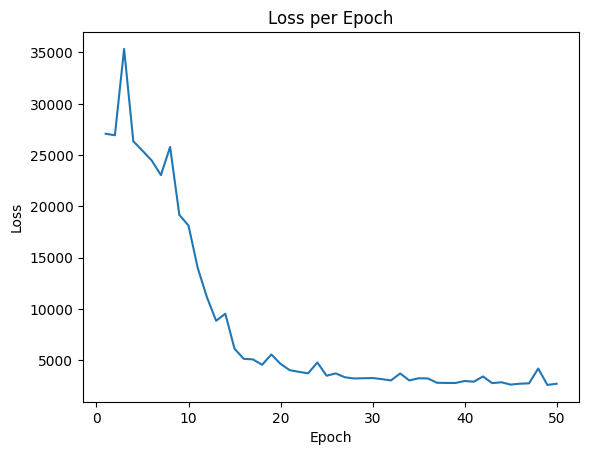

In [17]:
plt.plot(range(1, num_epochs + 1), epoch_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

In [25]:
# 학습된 모델로 추론하기
model.eval()  # 추론모드로 변경 (e.g., dropout)
test_predictions = []
true_values = []
with torch.no_grad():  # 그래디언트 계산 끄기
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.append(outputs)
        true_values.append(targets)

test_predictions = torch.cat(test_predictions, dim=0)
true_values = torch.cat(true_values, dim=0)

In [ ]:
print(test_predictions[:10,0])
print(true_values[:10])

tensor([253.1427, 249.5439, 161.4968, 102.6006, 153.6000, 262.7644,  86.2296,
        195.8628, 158.7789, 223.7188])
tensor([321., 215., 127.,  64., 175., 275., 179., 232., 142.,  99.])


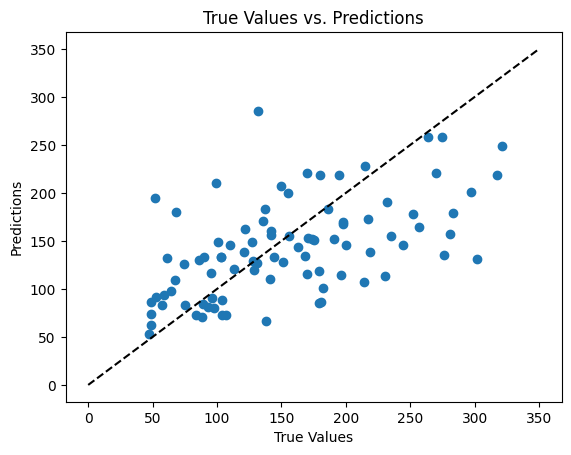

In [34]:
plt.plot(true_values.detach().numpy(),
         test_predictions.detach().numpy(), 'o')
plt.plot([0, 350], [0, 350], 'k--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

## 2. torch 주요 레이어의 동작 확인
인공신경망에는 다양한 유형의 레이어들이 존재하며, 인공신경망은 이러한 레이어들을 어떻게 쌓는지 혹은 어떻게 연결하는지에 따라서 전체 동작이 구성됩니다.

대표적으로
- linear
- conv2d
- flatten
- dropout
- MaxPool2d
- LSTM
- Transformer
등이 있습니다.

딥러닝 코딩을 위해서는 기본적으로 각 레이어의 입력과 출력의 형태에 따라 이전 레이어의 출력이 다음 레이어의 입력될 수 있도록 매칭해주는 것이 중요합니다.

In [35]:
sample1d = torch.rand(10, 5) #tabular
sample2d = torch.rand(10, 7, 5) #time series
sample3d = torch.rand(10, 7, 7, 5) #image

In [36]:
# 1. flatten layer
flatten_layer = nn.Flatten()
output1d = flatten_layer(sample1d)
output2d = flatten_layer(sample2d)
output3d = flatten_layer(sample3d)
print(output1d.shape)
print(output2d.shape)
print(output3d.shape)

torch.Size([10, 5])
torch.Size([10, 35])
torch.Size([10, 245])


In [38]:
# 2. linear layer (keras dense layer)
linear_layer = nn.Linear(5, 3)
output1d = linear_layer(sample1d)
output2d = linear_layer(sample2d)
output3d = linear_layer(sample3d)
print(output1d.shape)
print(output2d.shape)
print(output3d.shape)

torch.Size([10, 3])
torch.Size([10, 7, 3])
torch.Size([10, 7, 7, 3])


In [39]:
# 3. ReLU layer (activation function)
hidden = nn.Linear(5,3)(sample1d)
print(f"Before ReLU: {hidden}\n\n")
hidden_after_relu = nn.ReLU()(hidden)
print(f"After ReLU: {hidden_after_relu}")

Before ReLU: tensor([[ 0.0585,  0.3671, -0.5146],
        [-0.0919,  0.3867, -0.5651],
        [ 0.1523,  0.2800, -0.4026],
        [-0.1693,  0.0506, -0.2895],
        [-0.1864,  0.3157, -0.5326],
        [-0.2783,  0.2281, -0.5111],
        [ 0.0786,  0.3286, -0.4527],
        [ 0.0281,  0.3290, -0.5040],
        [-0.3772,  0.1846, -0.4987],
        [-0.1732,  0.5451, -0.7671]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0585, 0.3671, 0.0000],
        [0.0000, 0.3867, 0.0000],
        [0.1523, 0.2800, 0.0000],
        [0.0000, 0.0506, 0.0000],
        [0.0000, 0.3157, 0.0000],
        [0.0000, 0.2281, 0.0000],
        [0.0786, 0.3286, 0.0000],
        [0.0281, 0.3290, 0.0000],
        [0.0000, 0.1846, 0.0000],
        [0.0000, 0.5451, 0.0000]], grad_fn=<ReluBackward0>)


In [41]:
# 4. Softmax layer (activation function)
print(f"Before Softmax: {sample1d}\n\n")
hidden_after_softmax = nn.Softmax()(sample1d)

Before Softmax: tensor([[0.3588, 0.9724, 0.4035, 0.0754, 0.5436],
        [0.5356, 0.3949, 0.3186, 0.8235, 0.1791],
        [0.1508, 0.4726, 0.2074, 0.1242, 0.4782],
        [0.9062, 0.6580, 0.5567, 0.0572, 0.3292],
        [0.5484, 0.9356, 0.9281, 0.3958, 0.5382],
        [0.7061, 0.8853, 0.8529, 0.3987, 0.8532],
        [0.0773, 0.6887, 0.6743, 0.1699, 0.4828],
        [0.0671, 0.0454, 0.1997, 0.7456, 0.6929],
        [0.6131, 0.2513, 0.9015, 0.9541, 0.8129],
        [0.2781, 0.8303, 0.7104, 0.9113, 0.8801]])




In [42]:
print(f"After Softmax: {hidden_after_softmax}")

After Softmax: tensor([[0.1710, 0.3158, 0.1788, 0.1288, 0.2057],
        [0.2124, 0.1846, 0.1710, 0.2833, 0.1487],
        [0.1724, 0.2379, 0.1825, 0.1679, 0.2392],
        [0.2878, 0.2245, 0.2029, 0.1231, 0.1616],
        [0.1729, 0.2547, 0.2528, 0.1485, 0.1712],
        [0.1906, 0.2279, 0.2207, 0.1401, 0.2207],
        [0.1378, 0.2540, 0.2503, 0.1512, 0.2067],
        [0.1437, 0.1406, 0.1640, 0.2831, 0.2686],
        [0.1767, 0.1231, 0.2358, 0.2486, 0.2158],
        [0.1252, 0.2175, 0.1929, 0.2358, 0.2286]])


In [43]:
print(f"After Summation: {torch.sum(hidden_after_softmax,-1)}")

After Summation: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [53]:
# 5. dropout (randomly drop values to zero)
dropout_layer = nn.Dropout(p=0.5)
output1d = dropout_layer(sample1d)
output1d_1 = dropout_layer(sample1d)
output2d = dropout_layer(sample2d)
output3d = dropout_layer(sample3d)
print(output1d.shape)
print(output2d.shape)
print(output3d.shape)

torch.Size([10, 5])
torch.Size([10, 7, 5])
torch.Size([10, 7, 7, 5])


In [54]:
print(f"Before Dropout: {sample1d}\n\n")
print(f"After Dropout: {output1d}\n\n")
print(f"Second attempt Dropout: {output1d_1}\n\n")

Before Dropout: tensor([[0.3588, 0.9724, 0.4035, 0.0754, 0.5436],
        [0.5356, 0.3949, 0.3186, 0.8235, 0.1791],
        [0.1508, 0.4726, 0.2074, 0.1242, 0.4782],
        [0.9062, 0.6580, 0.5567, 0.0572, 0.3292],
        [0.5484, 0.9356, 0.9281, 0.3958, 0.5382],
        [0.7061, 0.8853, 0.8529, 0.3987, 0.8532],
        [0.0773, 0.6887, 0.6743, 0.1699, 0.4828],
        [0.0671, 0.0454, 0.1997, 0.7456, 0.6929],
        [0.6131, 0.2513, 0.9015, 0.9541, 0.8129],
        [0.2781, 0.8303, 0.7104, 0.9113, 0.8801]])


After Dropout: tensor([[0.0000, 1.9448, 0.0000, 0.1508, 1.0872],
        [0.0000, 0.7899, 0.0000, 1.6470, 0.0000],
        [0.3017, 0.9452, 0.4147, 0.2484, 0.9564],
        [0.0000, 0.0000, 1.1133, 0.1144, 0.0000],
        [1.0969, 0.0000, 0.0000, 0.0000, 1.0763],
        [1.4123, 1.7707, 1.7057, 0.7974, 0.0000],
        [0.1546, 1.3775, 1.3485, 0.0000, 0.0000],
        [0.1342, 0.0000, 0.0000, 1.4912, 0.0000],
        [1.2262, 0.0000, 1.8030, 1.9082, 0.0000],
        [0.0000,

In [55]:
dropout_layer.eval()
output1d = dropout_layer(sample1d)
print(f"After Dropout(eval): {output1d}\n\n")
output1d_2 = dropout_layer(sample1d)
print(f"After Dropout(eval): {output1d_2}\n\n")

After Dropout(eval): tensor([[0.3588, 0.9724, 0.4035, 0.0754, 0.5436],
        [0.5356, 0.3949, 0.3186, 0.8235, 0.1791],
        [0.1508, 0.4726, 0.2074, 0.1242, 0.4782],
        [0.9062, 0.6580, 0.5567, 0.0572, 0.3292],
        [0.5484, 0.9356, 0.9281, 0.3958, 0.5382],
        [0.7061, 0.8853, 0.8529, 0.3987, 0.8532],
        [0.0773, 0.6887, 0.6743, 0.1699, 0.4828],
        [0.0671, 0.0454, 0.1997, 0.7456, 0.6929],
        [0.6131, 0.2513, 0.9015, 0.9541, 0.8129],
        [0.2781, 0.8303, 0.7104, 0.9113, 0.8801]])


After Dropout(eval): tensor([[0.3588, 0.9724, 0.4035, 0.0754, 0.5436],
        [0.5356, 0.3949, 0.3186, 0.8235, 0.1791],
        [0.1508, 0.4726, 0.2074, 0.1242, 0.4782],
        [0.9062, 0.6580, 0.5567, 0.0572, 0.3292],
        [0.5484, 0.9356, 0.9281, 0.3958, 0.5382],
        [0.7061, 0.8853, 0.8529, 0.3987, 0.8532],
        [0.0773, 0.6887, 0.6743, 0.1699, 0.4828],
        [0.0671, 0.0454, 0.1997, 0.7456, 0.6929],
        [0.6131, 0.2513, 0.9015, 0.9541, 0.8129],
     

In [ ]:
# 6. Conv2d (convolution layer in CNN)
# Conv2d의 입력으로 들어가는 데이터의 shape은 N(batch), C(channel), H(height), W(width)
# Keras에서의 shape은 N, H, W, C (default=channel last)
# sample3d = torch.rand(10, 7, 7, 5) image

conv2d_layer = nn.Conv2d(in_channels=7, out_channels=3, kernel_size=3, stride=1, padding=1)
output2d = conv2d_layer(sample3d)
print(output2d.shape)

torch.Size([10, 3, 7, 5])


In [ ]:
# 7.LSTM
# LSTM 레이어의 입력으로 들어가는 데이터의 shape은 L (sequence lenght), N(batch), C (Channel)
# batch_first를 True로 설정하면 N, L, C로 변경

lstm_layer = nn.LSTM(input_size=5, hidden_size=3, num_layers=1, batch_first=True)
output2d = lstm_layer(sample2d)
print(output2d.shape)

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
# LSTM레이어의 출력은 tuple
print(type(output2d))
print(type(output2d[0])) #
print(type(output2d[1]))

<class 'tuple'>
<class 'torch.Tensor'>
<class 'tuple'>


In [ ]:
print(output2d[0].shape) # N, L, C
print(output2d[1][0].shape) # D*N_LAYER, N, C, -> last hidden state
print(output2d[1][1].shape) # D*N_LAYER, N, C  -> last cell state

torch.Size([10, 7, 3])
torch.Size([1, 10, 3])
torch.Size([1, 10, 3])


LSTM 레이어의 hidden_size와 num_layer, bidirectional option을 바꾸는 경우?

In [ ]:
lstm_layer = nn.LSTM(input_size=5, hidden_size=3, num_layers=3, bidirectional=True, batch_first=True)
output2d = lstm_layer(sample2d, (torch.randn(6, 10, 3),torch.randn(6,10,3)))
print(output2d[0].shape)
print(output2d[1][0].shape)

torch.Size([10, 7, 6])
torch.Size([6, 10, 3])


In [ ]:
sample2d.shape

torch.Size([10, 7, 5])

In [ ]:
# 7. Transformer = 인코더 + 디코더로 구성
# 인코더의 예시
# 디코더는 인코더 + masked self attention + encoder&decoder attention

encoder_layer = nn.TransformerEncoderLayer(d_model=5, nhead=1, batch_first = True)
## Batch first = True for N, L, C setting
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)

output2d = transformer_encoder(sample2d)
print(output2d.shape)

torch.Size([10, 7, 5])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


In [ ]:
encoder_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, batch_first = True)
## Batch first = True for N, L, C setting
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
output2d_new = transformer_encoder(torch.rand(10,7,128))
print(output2d_new.shape)

torch.Size([10, 7, 128])


## 3. 모델 구성
- 간단한 직선 구조의 모델 => nn.sequential 활용
- 복잡한 모델을 만들고 싶은 경우 => nn.Module을 상속받아 커스텀 모델 정의

nn.sequential은 입력된 레이어들을 순차적으로 연결하여 하나의 네트워크를 구성함.

In [ ]:
# 1. nn.sequential
# shape of sample1d = 10,5
model = nn.Sequential(
    nn.Linear(5, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)

In [ ]:
output = model(sample1d)
print(output.shape)

torch.Size([10, 2])


In [ ]:
# nn.sequential with LSTM?
model_2 = nn.Sequential(
    nn.LSTM(input_size=5, hidden_size=3, num_layers=1, batch_first=True),
    nn.LSTM(input_size=3, hidden_size = 4, num_layers=1, batch_first=True),
    nn.Linear(4,3)
    )

In [ ]:
model_2(sample2d)
# LSTM의 출력이 튜플이기때문에 다른 레이어와의 호환이 어려움.
# 레이어를 쌓기위한 레이어 수 변수가 별도로 존재

AttributeError: 'tuple' object has no attribute 'dim'

커스텀 클래스를 통한 커스텀 모델을 생성하기위해서는
1. nn.Module 상속
2. __init__ 메서드 정의 -> 신경망 구성 요소 선언
3. forward 메서드 정의 -> 레이어 사이의 연결관계 정의

일반적인 커스텀 클래스를 생성하는 경우
객체 생성 후의 동작은 __call__ 메서드 구현을 통해 이뤄짐.
torch의 nn.Module에서 __call__ 메서드에서 forward 메서드를 호출하므로 forward 메서드 안에서 레이어 간 연결관계를 정의할 수 있음.

In [ ]:
class CustomModel(nn.Module):
    def __init__(self, d_in = 5, n1=64, n2 = 4):
        super().__init__()
        self.linear1 = nn.Linear(d_in, n1)
        self.linear2 = nn.Linear(n1, n2)

    def forward(self, x): #self
        x = self.linear1(x)
        x = self.linear2(x)
        return x

In [ ]:
c_model = CustomModel(d_in=5, n1=32, n2 = 16)
output = c_model(sample1d)
print(output.shape)

torch.Size([10, 16])


클래스를 통한 LSTM 모델 구현

In [ ]:
class CustomLSTM(nn.Module):
    def __init__(self, d_in = 5, n1=64, n2 = 4):
        super().__init__()
        self.lstm = nn.LSTM(input_size=d_in, hidden_size=n1, num_layers=1, batch_first=True)
        self.linear = nn.Linear(n1, n2)

    def forward(self, x): #self
        x, _ = self.lstm(x) # lstm 모듈의 출력이 튜플이므로 이를 고려하연 레이어를 연결
        x = self.linear(x)
        return x

In [ ]:
lstm_model = CustomLSTM(d_in=5, n1=32, n2 = 16)
output = lstm_model(sample2d)
print(output.shape)

torch.Size([10, 7, 16])


# 2. pytorch lightning
- pytorch는 keras, scikit-learn 등에 대비하여 모델 학습 및 활용을 위한 코드 구성이 복잡함.
- keras와 scikit-learn 모델들에서는 .fit(), .predict() 등의 메서드를 통해 간단하게 모델 학습 및 예측 등 구현
- pytorch-lightining 라이브러리를 통해 코드 구현을 간결화 할 수 있음.

pytorch lightning 라이브러리의 주요 요소는 lightning 모듈과 trainer임.

lightning module을 상속받아 커스텀 모델을 구현하며
 구현하는 커스텀 모델 안에 학습(training), 검증(validation), 테스트(test), 예측(prediction) 단계에서 수행해야 하는 과정을 정의함.

trainer를 통해 모델 학습 전반을 관리하며, .fit(), .predict() 등의 메서드를 통해 high level에서 torch 모델에 활용이 가능함.

pytorch-lightning을 통해 코드 구조를 간소화하고, 코드의 모듈화를 촉진하여 PyTorch 기반 모델 개발을 보다 효율적으로 할수 있음.


## 1. 기초 코드

In [59]:
#훈련, 테스트 데이터셋 구성
train_dataset = TensorDataset(torch.tensor(X_train,dtype=torch.float32), torch.tensor(y_train,dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test,dtype=torch.float32))

#데이터 로더 구성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# 데이터 로더의 역할은?
# 데이터셋을 분할하며 학습을 위한 미니배치 생성

In [60]:
print("Input shape", X_train.shape)
print("Output shape", y_train.shape)

Input shape (353, 10)
Output shape (353,)


In [61]:
!pip install pytorch-lightning
import pytorch_lightning as pl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 19.1 MB/s eta 0:00:00


lightning 모듈을 상속받아 커스텀 클래스 구현

In [64]:
class LitModel(pl.LightningModule):
    def __init__(self, d_in = 10, n1 = 64, n2 = 64, lr = 0.001):
        super().__init__()
        # forward 메서드에서 활용
        self.linear1 = nn.Linear(d_in, n1)
        self.linear2 = nn.Linear(n1, n2)
        self.linear3 = nn.Linear(n2, 1)

        # optimizer 설정시 활용
        self.lr = lr

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y.unsqueeze(1))
        # y에 unsqueeze를 하는 이유는?
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        # LR scheduler 사용시
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
        return {'optimizer':optimizer,
                    'lr_scheduler' : scheduler,
                    'monitor':'train_loss'}
        # LR scheduler 미사용시
        # return optimizer

In [65]:
# 객체 생성
lit_model = LitModel(d_in = 10, n1 = 64, n2 = 64, lr = 0.001)

# trainer 객체 생성
trainer = pl.Trainer(max_epochs=50)
# trainer = pl.Trainer(max_epochs=50,accelerator = 'gpu')

# 학습
trainer.fit(lit_model, train_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 704    | train
1 | linear2 | Linear | 4.2 K  | train
2 | linear3 | Linear | 65     | train
-------------------------------------------
4.9 K     Trainable params
0         Non-trainable params
4.9 K     Total params
0.020     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
# lit_model을 직접호출시 forward 메서드 수행
y_hat = lit_model(torch.tensor(X_test,dtype=torch.float32))
print("y_hat shape : ", y_hat.shape)
print("y_label shape : ", y_test.shape)

y_hat shape :  torch.Size([89, 1])
y_label shape :  (89,)


## 2. trainer를 통한 메서드 활용

In [66]:
trainer.test(lit_model, test_loader)

MisconfigurationException: No `test_step()` method defined to run `Trainer.test`.

In [67]:
trainer.predict(lit_model, test_loader)

Predicting: |          | 0/? [00:00<?, ?it/s]

TypeError: linear(): argument 'input' (position 1) must be Tensor, not list

In [68]:
class LitModelPlus(pl.LightningModule):
    def __init__(self, d_in = 10, n1 = 64, n2 = 64, lr = 0.001):
        super().__init__()
        # forward 메서드에서 활용
        self.linear1 = nn.Linear(d_in, n1)
        self.act = nn.LeakyReLU()
        self.linear2 = nn.Linear(n1, n2)
        self.linear3 = nn.Linear(n2, 1)

        # optimizer 설정시 활용
        self.lr = lr

    def forward(self, x):
        x = self.linear1(x)
        x = self.act(x)
        x = self.linear2(x)
        x = self.act(x)
        x = self.linear3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y.unsqueeze(1))
        self.log('train_loss', loss)
        return loss

    # validation, test, predict step 정의

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y.unsqueeze(1))
        self.log('val_loss', loss)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y.unsqueeze(1))
        self.log('test_loss', loss)

    def predict_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        return y_hat

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        # LR scheduler 사용시
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
        return {'optimizer':optimizer,
                    'lr_scheduler' : scheduler,
                # val_loss로 변경
                'monitor':'val_loss'}
        # LR scheduler 미사용시
        # return optimizer

In [69]:
lit_model_plus = LitModelPlus(d_in = 10, n1 = 64, n2 = 64, lr = 0.001)
trainer = pl.Trainer(max_epochs=20)
trainer.fit(lit_model_plus, train_loader) #error 발생

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type      | Params | Mode 
----------------------------------------------
0 | linear1 | Linear    | 704    | train
1 | act     | LeakyReLU | 0      | train
2 | linear2 | Linear    | 4.2 K  | train
3 | linear3 | Linear    | 65     | train
----------------------------------------------
4.9 K     Trainable params
0         Non-trainable params
4.9 K     Total params
0.020     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

MisconfigurationException: ReduceLROnPlateau conditioned on metric val_loss which is not available. Available metrics are: ['train_loss']. Condition can be set using `monitor` key in lr scheduler dict

In [70]:
from torch.utils.data import random_split

# Train-validation split (예: 80% train, 20% validation)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the dataset
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
new_train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

In [71]:
# trainer.fit(lit_model_plus, train_loader) #기존 error 발생 코드
trainer.fit(lit_model_plus, train_dataloaders = new_train_loader, val_dataloaders = val_loader)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/lightning_logs/version_2/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type      | Params | Mode 
----------------------------------------------
0 | linear1 | Linear    | 704    | train
1 | act     | LeakyReLU | 0      | train
2 | linear2 | Linear    | 4.2 K  | train
3 | linear3 | Linear    | 65     | train
----------------------------------------------
4.9 K     Trainable params
0         Non-trainable params
4.9 K     Total params
0.020     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (9) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [72]:
trainer.logged_metrics

{'train_loss': tensor(5338.9976), 'val_loss': tensor(4618.5225)}

In [73]:
from pytorch_lightning.loggers import CSVLogger

logger = CSVLogger(save_dir="./logs/")
trainer = pl.Trainer(logger=logger, max_epochs=50)
trainer.fit(lit_model_plus, new_train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type      | Params | Mode 
----------------------------------------------
0 | linear1 | Linear    | 704    | train
1 | act     | LeakyReLU | 0      | train
2 | linear2 | Linear    | 4.2 K  | train
3 | linear3 | Linear    | 65     | train
----------------------------------------------
4.9 K     Trainable params
0         Non-trainable params
4.9 K     Total params
0.020     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


## 2. Optuna와 연계한 튜닝방법

다음의 하이퍼파라미터에 대한 비교를 수행할 수 있는 코드를 작성합니다.

- 활성함수의 종류
- 뉴런의 수
- 러닝 레이트

위의 값들은 라이트닝 모델의 입력으로 받아서 조정 가능하도록 클래스를 생성합니다.

In [80]:
class LitModel(pl.LightningModule):
    def __init__(self, d_in = 10, n1 = 64, n2 = 64, act_type = 'relu', lr = 0.001):
        super().__init__()
        # forward 메서드에서 활용
        self.linear1 = nn.Linear(d_in, n1)
        self.linear2 = nn.Linear(n1, n2)
        self.linear3 = nn.Linear(n2, 1)
        if act_type == 'relu':
            self.act = nn.ReLU()
        elif act_type == 'sigmoid':
            self.act = nn.Sigmoid()
        elif act_type == 'tanh':
            self.act = nn.Tanh()

        # optimizer 설정시 활용
        self.lr = lr

    def forward(self, x):
        x = self.linear1(x)
        x = self.act(x)
        x = self.linear2(x)
        x = self.act(x)
        x = self.linear3(x)
        return x

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y.unsqueeze(1))
        self.log('val_loss', loss)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y.unsqueeze(1))
        self.log('test_loss', loss)
        return loss

    def predict_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        return y_hat, y

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y.unsqueeze(1))
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        scheduler = {
        'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True),
        'monitor': 'train_loss'  # Metric to monitor, adjust as needed
        }
        return [optimizer], [scheduler]

In [56]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [75]:
import optuna
def objective(trial):

    # 모델 정의
    # hyperparameter : num_layer, num_units, actviation function
    n1_suggest = trial.suggest_int('n1', 16, 128)
    n2_suggest = trial.suggest_int('n2', 16, 128)
    act_type = trial.suggest_categorical('act_type', ['relu', 'sigmoid', 'tanh'])
    lr_rate = trial.suggest_loguniform('lr_rate', 1e-5, 1e-2)

    model = LitModel(d_in=10, n1=n1_suggest,
                     n2=n2_suggest, act_type=act_type,
                     lr=lr_rate                     )

    # Logger and Trainer
    trainer = pl.Trainer(
        max_epochs=10,  # Set to a small number for quick evaluation
        enable_checkpointing=False,  # Disable checkpointing for faster trials
    )

    # Train the model
    trainer.fit(model, new_train_loader, val_loader)

    # Get the best validation loss
    val_loss = trainer.callback_metrics['val_loss'].item()
    return val_loss

#direction 을 통해 최적화 방향 결정
study = optuna.create_study(direction='minimize')
# trial class를 상속받아 생성한 커스텀 objective 최적화
study.optimize(objective, n_trials=10)

[I 2024-11-21 00:00:52,727] A new study created in memory with name: no-name-7b319d1c-730e-497a-9373-b3983f566969
<ipython-input-75-103a5adfb59e>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr_rate = trial.suggest_loguniform('lr_rate', 1e-5, 1e-2)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | linear1 | Linear  | 1.3 K  | train
1 | linear2 | Linear  | 3.8 K  | train
2 | linear3 | Linear  | 33     | train
3 | act     | Sigmoid | 0      | train
--------------------------------------------
5.1 K     Tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:00:55,209] Trial 0 finished with value: 26161.03515625 and parameters: {'n1': 118, 'n2': 32, 'act_type': 'sigmoid', 'lr_rate': 0.0011064623458015843}. Best is trial 0 with value: 26161.03515625.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 1.2 K  | train
1 | linear2 | Linear | 10.8 K | train
2 | linear3 | Linear | 103    | train
3 | act     | ReLU   | 0      | train
-------------------------------------------
12.1 K    Trainable params
0         Non-trainable params
12.1 K    Total params
0.048     Total estimated model params size (MB)
4

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:00:57,138] Trial 1 finished with value: 26129.978515625 and parameters: {'n1': 105, 'n2': 102, 'act_type': 'relu', 'lr_rate': 0.0002640558666615627}. Best is trial 1 with value: 26129.978515625.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 1.2 K  | train
1 | linear2 | Linear | 4.5 K  | train
2 | linear3 | Linear | 42     | train
3 | act     | Tanh   | 0      | train
-------------------------------------------
5.8 K     Trainable params
0         Non-trainable params
5.8 K     Total params
0.023     Total estimated model params size (MB)
4

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:00:58,928] Trial 2 finished with value: 26829.328125 and parameters: {'n1': 109, 'n2': 41, 'act_type': 'tanh', 'lr_rate': 0.00021539401331697834}. Best is trial 1 with value: 26129.978515625.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 1.0 K  | train
1 | linear2 | Linear | 4.6 K  | train
2 | linear3 | Linear | 49     | train
3 | act     | ReLU   | 0      | train
-------------------------------------------
5.7 K     Trainable params
0         Non-trainable params
5.7 K     Total params
0.023     Total estimated model params size (MB)
4   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:01:02,353] Trial 3 finished with value: 2370.688232421875 and parameters: {'n1': 95, 'n2': 48, 'act_type': 'relu', 'lr_rate': 0.008455992127819913}. Best is trial 3 with value: 2370.688232421875.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type    | Params | Mode 
--------------------------------------------
0 | linear1 | Linear  | 363    | train
1 | linear2 | Linear  | 4.0 K  | train
2 | linear3 | Linear  | 118    | train
3 | act     | Sigmoid | 0      | train
--------------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params siz

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:01:05,720] Trial 4 finished with value: 26350.095703125 and parameters: {'n1': 33, 'n2': 117, 'act_type': 'sigmoid', 'lr_rate': 0.00032893269787811883}. Best is trial 3 with value: 2370.688232421875.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 1.3 K  | train
1 | linear2 | Linear | 2.6 K  | train
2 | linear3 | Linear | 22     | train
3 | act     | ReLU   | 0      | train
-------------------------------------------
3.9 K     Trainable params
0         Non-trainable params
3.9 K     Total params
0.016     Total estimated model params size (

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:01:08,849] Trial 5 finished with value: 27152.853515625 and parameters: {'n1': 121, 'n2': 21, 'act_type': 'relu', 'lr_rate': 1.1949997303766399e-05}. Best is trial 3 with value: 2370.688232421875.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 759    | train
1 | linear2 | Linear | 2.2 K  | train
2 | linear3 | Linear | 33     | train
3 | act     | ReLU   | 0      | train
-------------------------------------------
3.0 K     Trainable params
0         Non-trainable params
3.0 K     Total params
0.012     Total estimated model params size (MB)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:01:12,037] Trial 6 finished with value: 16298.65625 and parameters: {'n1': 69, 'n2': 32, 'act_type': 'relu', 'lr_rate': 0.001525863277976048}. Best is trial 3 with value: 2370.688232421875.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 792    | train
1 | linear2 | Linear | 6.9 K  | train
2 | linear3 | Linear | 95     | train
3 | act     | ReLU   | 0      | train
-------------------------------------------
7.7 K     Trainable params
0         Non-trainable params
7.7 K     Total params
0.031     Total estimated model params size (MB)
4     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:01:14,430] Trial 7 finished with value: 26435.091796875 and parameters: {'n1': 72, 'n2': 94, 'act_type': 'relu', 'lr_rate': 0.0002428339050924156}. Best is trial 3 with value: 2370.688232421875.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 1.2 K  | train
1 | linear2 | Linear | 3.5 K  | train
2 | linear3 | Linear | 33     | train
3 | act     | Tanh   | 0      | train
-------------------------------------------
4.7 K     Trainable params
0         Non-trainable params
4.7 K     Total params
0.019     Total estimated model params size (MB)
4

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:01:16,281] Trial 8 finished with value: 26993.419921875 and parameters: {'n1': 107, 'n2': 32, 'act_type': 'tanh', 'lr_rate': 0.00018954022443204392}. Best is trial 3 with value: 2370.688232421875.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 902    | train
1 | linear2 | Linear | 5.6 K  | train
2 | linear3 | Linear | 69     | train
3 | act     | Tanh   | 0      | train
-------------------------------------------
6.6 K     Trainable params
0         Non-trainable params
6.6 K     Total params
0.026     Total estimated model params size (MB)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-11-21 00:01:18,223] Trial 9 finished with value: 27168.421875 and parameters: {'n1': 82, 'n2': 68, 'act_type': 'tanh', 'lr_rate': 1.8511816217654404e-05}. Best is trial 3 with value: 2370.688232421875.


In [76]:
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials:  10
Best trial:
  Value:  2370.688232421875
  Params: 
    n1: 95
    n2: 48
    act_type: relu
    lr_rate: 0.008455992127819913


In [81]:
best_params = study.best_trial.params

best_model = LitModel(
    d_in=10,
    n1=best_params['n1'],  # 최적의 n1
    n2=best_params['n2'],  # 최적의 n2
    act_type=best_params['act_type'],  # 최적의 활성화 함수
    lr=best_params['lr_rate']  # 최적의 학습률
)

trainer = pl.Trainer(
    logger=logger,
    max_epochs=50,  # 최종 학습에서는 더 많은 epoch으로 설정
    log_every_n_steps=10
)

# 최종 학습 데이터 로드
trainer.fit(best_model, new_train_loader, val_loader)

# 테스트 데이터 성능체크
trainer.test(best_model, test_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory ./logs/lightning_logs/version_0/checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | linear1 | Linear | 1.0 K  | train
1 | linear2 | Linear | 4.6 K  | train
2 | linear3 | Linear | 49     | train
3 | act     | ReLU   | 0      | train
-------------------------------------------
5.7 K     Trainable params
0         Non-trainable params
5.7 K     Total params
0.023     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (9) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     3793.525634765625     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 3793.525634765625}]

In [83]:
y_hats = trainer.predict(best_model, test_loader)

Predicting: |          | 0/? [00:00<?, ?it/s]

In [85]:
predictions, true_values = map(lambda x: torch.cat(x, dim=0), zip(*y_hats))

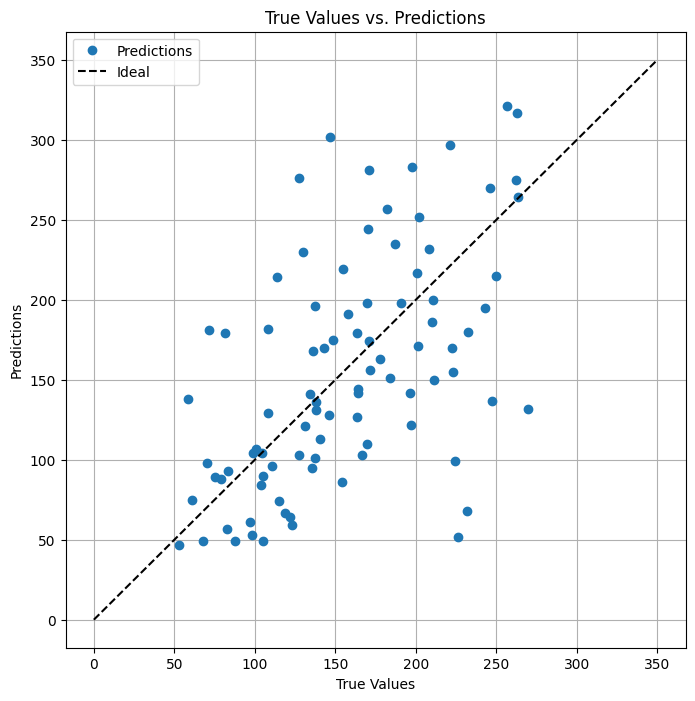

In [88]:

# 그래프 플로팅
plt.figure(figsize=(8, 8))
plt.plot(predictions.detach().numpy(),
         true_values.detach().numpy(), 'o', label='Predictions')
plt.plot([0, 350], [0, 350], 'k--', label='Ideal')  # 대각선 (완벽한 예측선)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.legend()
plt.grid()
plt.show()

# 1. 딥러닝 with Keras

케라스는 딥러닝을 위한 텐서플로우 (tensorflow) 기반 하이레벨 API 입니다.

당뇨(diabetes) 데이터를 활용하여 딥러닝 실습을 진행해보도록 하겠습니다.

## 1. 기본 Keras 코드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
# 당뇨 데이터셋 불러오기
# 컬럼 및 데이터셋 구성정보 확인
raw_data = load_diabetes()
print(raw_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# 입력 특성과 타겟 변수 나누기
X = raw_data.data
y = raw_data.target

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 5ms/step


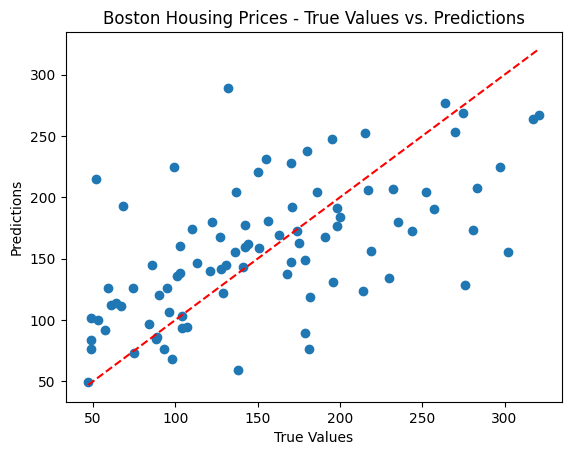

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # x=y 그래프
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Boston Housing Prices - True Values vs. Predictions')
plt.show()

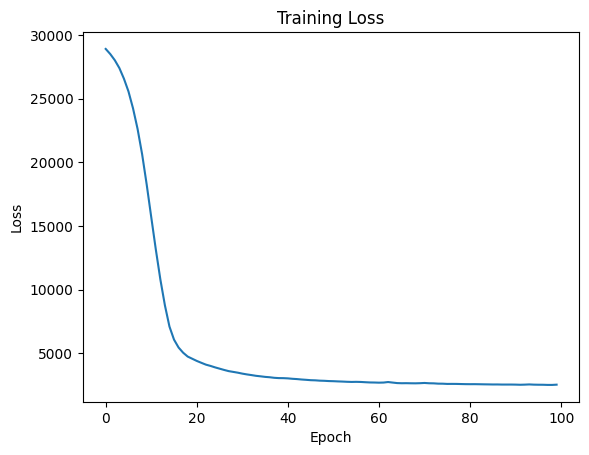

In [ ]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from sklearn import metrics

# MAE (Mean Absolute Error)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# MAPE (Mean Absolute Percentage Error)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape*100:.2f}%")

# R2 Score (coefficient of determination)
r2 = metrics.r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")


MAE: 44.99
MAPE: 36.79%
R2 Score: 0.33


## 2. 텐서플로우 주요 레이어의 동작 확인

In [ ]:
# 기본 Dense layer
import tensorflow as tf

x = tf.ones((100,10))
y = tf.keras.layers.Dense(20)(x)
print(y[0])
print(y.shape)

tf.Tensor(
[-0.32977563  0.80587983 -0.79963386 -1.0517359  -0.7948185   0.6113416
  1.2425911   0.5006946  -0.76024604  0.877233   -0.39546874  0.3338201
 -0.3187905  -0.6468119  -0.68525505  0.7359647   0.5072092  -0.41532248
  0.04094476  1.0309591 ], shape=(20,), dtype=float32)
(100, 20)


In [ ]:
x = tf.ones((100,10))
y = tf.keras.layers.Dense(20, activation='relu')(x)
print(y[0])
print(y.shape)

tf.Tensor(
[0.7011312  0.59932065 0.         1.4314146  0.         0.
 1.1980435  0.8329772  0.         1.2531204  0.08027962 0.
 0.38766932 0.71711445 0.         0.63873273 0.         1.2781204
 0.         0.        ], shape=(20,), dtype=float32)
(100, 20)


In [ ]:
x = tf.ones((100,3,10))
y = tf.keras.layers.Dense(20, activation='selu')(x)
print(y[0])
print(y.shape)

tf.Tensor(
[[ 0.1825176  -0.5612715  -0.7785587   0.2603734  -0.9975971  -1.2725809
   0.49723554  0.6706506   0.16999556  0.30096593  1.193248   -0.50710696
   0.1316501   1.800775    0.8214951  -0.7814513   1.216945   -0.580333
  -0.40177035  0.44487846]
 [ 0.1825176  -0.5612715  -0.7785587   0.2603734  -0.9975971  -1.2725809
   0.49723554  0.6706506   0.16999556  0.30096593  1.193248   -0.50710696
   0.1316501   1.800775    0.8214951  -0.7814513   1.216945   -0.580333
  -0.40177035  0.44487846]
 [ 0.1825176  -0.5612715  -0.7785587   0.2603734  -0.9975971  -1.2725809
   0.49723554  0.6706506   0.16999556  0.30096593  1.193248   -0.50710696
   0.1316501   1.800775    0.8214951  -0.7814513   1.216945   -0.580333
  -0.40177035  0.44487846]], shape=(3, 20), dtype=float32)
(100, 3, 20)


In [ ]:
# Convolution layer
x = tf.ones((100, 32, 32, 3)) # N x H x W x D
conv_layer = tf.keras.layers.Conv2D(16, kernel_size=(3, 3))
y = conv_layer(x)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor(
[[[-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  ...
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]]

 [[-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  ...
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.09947574
   -0.37381208]
  [-0.6952233   1.332671    0.20924927 ... -0.87417763 -0.0994

In [ ]:
# LSTM layer
x = tf.ones((100, 10, 32)) #N x SeqLen x Dim
lstm_layer = tf.keras.layers.LSTM(64)
y = lstm_layer(x)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor(
[-0.23819305 -0.14220291  0.01978228  0.4894313  -0.1504982   0.14128655
  0.33369884 -0.23645318  0.23966585  0.47571298 -0.2959153  -0.08304591
 -0.19552667  0.09816436 -0.388554    0.02173348  0.02695203  0.18810916
 -0.29199836 -0.16043428 -0.3369882   0.43897033  0.05352104 -0.4883921
  0.39062077 -0.05799114  0.41229698  0.09227151  0.00659599 -0.0709353
 -0.14813122 -0.534027    0.25888    -0.23502144 -0.3237153  -0.26964223
  0.08163007 -0.47474518  0.12142213 -0.3016842  -0.12380067  0.09437954
 -0.33966452 -0.30105492  0.19232914 -0.487954    0.3203148  -0.01560181
  0.374239    0.34299344 -0.36753464  0.12051749  0.33895954  0.2652601
  0.16898067 -0.5663703   0.11017505  0.19238934 -0.22675136  0.07201779
  0.05170892  0.11311064  0.44120657 -0.17746007], shape=(64,), dtype=float32)
(100, 64)


In [ ]:
# LSTM layer
x = tf.ones((100, 10, 32))
lstm_layer1 = tf.keras.layers.LSTM(64)
lstm_layer2 = tf.keras.layers.LSTM(64)
y1 = lstm_layer1(x)
# 에러 발생?
y2 = lstm_layer2(y1)
# 출력 확인
print(y1[0])
print(y1.shape)

ValueError: Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (100, 64)

In [ ]:
# LSTM layer
x = tf.ones((100, 10, 32))
lstm_layer1 = tf.keras.layers.LSTM(64, return_sequences=True)
lstm_layer2 = tf.keras.layers.LSTM(64)
y1 = lstm_layer1(x)
y2 = lstm_layer2(y1)
# 출력 확인
print(y1.shape)

(100, 10, 64)


In [ ]:
# Dropout 레이어

x = tf.ones((100, 10))
dropout_layer = tf.keras.layers.Dropout(0.5)
y1 = dropout_layer(x, training=True)  # training=True로 설정하여 학습 모드로 설정
y2 = dropout_layer(x, training=True)  # training=True로 설정하여 학습 모드로 설정
# 출력 확인
# 동일한 dropout layer이지만?
print(y1[0])
print(y2[0])
print(y.shape)

tf.Tensor([0. 0. 0. 0. 2. 2. 0. 0. 0. 2.], shape=(10,), dtype=float32)
tf.Tensor([0. 2. 2. 0. 0. 0. 0. 2. 0. 2.], shape=(10,), dtype=float32)
(100, 64)


In [ ]:
y1 = dropout_layer(x, training=False)  # training=True로 설정하여 학습 모드로 설정
y2 = dropout_layer(x, training=False)  # training=True로 설정하여 학습 모드로 설정
print(y1[0])
print(y2[0])


tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(10,), dtype=float32)
tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(10,), dtype=float32)


In [ ]:
x = tf.ones((100, 10))
batchnorm_layer = tf.keras.layers.BatchNormalization()
y = batchnorm_layer(x, training=True)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
(100, 10)


## 3. 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# 모델 구성
model = Sequential()
model.add(Dense(64, input_shape=(10,)))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(1)) # 분류모델인경우 model.add(Dense(1), activation = 'sigmoid')

# 모델 컴파일
model.compile(optimizer='adam', loss='mse') # 마찬가지로 분류모델의 경우 model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

## 4. 모델 학습 및 다루기

In [ ]:
# 모델 트레이닝 관련
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3)  # 3 에포크 동안 개선이 없으면 학습 조기 종료
hist = model.fit(X_train, y_train,
          validation_data=(X_train[:10], y_train[:10]),
          epochs = 50,
          callbacks=[early_stopping]) # validation set 필요


Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 28923.1816 - val_loss: 21191.1738
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 28700.2715 - val_loss: 21035.3184
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 28469.2402 - val_loss: 20858.3340
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 28242.7852 - val_loss: 20642.4902
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 27920.9355 - val_loss: 20360.5000
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 27543.3730 - val_loss: 20034.5469
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 26973.5801 - val_loss: 19650.7402
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 26312.8242 - val_loss: 19166.8809
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 25670.3652 - val_loss: 18559.4375
Epoch 10/50
12/12 [==========================

In [ ]:
from keras.callbacks import ModelCheckpoint

# 모델 저장 콜백 설정
checkpoint = ModelCheckpoint('./best_model.h5', save_best_only=True, save_weights_only=False)

# 모델 학습 시 콜백 사용
model.fit(X_train, y_train,
        validation_data=(X_train[:10], y_train[:10]),
        epochs = 50,
        callbacks=[checkpoint], verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

best_model = load_model('./best_model.h5')

# 테스트 데이터에 대해 예측 수행
predictions = best_model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


# Keras with Optuna

하이퍼파라미터 최적화 라이브러리인 Optuna를 keras 와 함께 사용할 수 도 있습니다.
마찬가지로 네트워크의 파라미터를 고려한 최적화 함수를 구성하면됩니다.

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
import optuna
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop

def objective(trial):

    # 모델 정의
    # hyperparameter : num_layer, num_units, actviation function
    num_layers = trial.suggest_int('num_layers', 1, 3)
    model = Sequential()
    for i in range(num_layers):
        num_units = trial.suggest_categorical('num_units_layer{}'.format(i), [32, 64])
        activation = trial.suggest_categorical('activation_layer{}'.format(i), ['relu', 'tanh'])
        model.add(Dense(units=num_units, activation=activation))
    model.add(Dense(1))

    # 옵티마이저 선택
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    optimizer = RMSprop(learning_rate=lr)

    model.compile(loss='mean_squared_error', optimizer=optimizer)  # 회귀 문제이므로 손실함수로 MSE 사용

    model.fit(X_train, y_train,
              epochs=2,
              batch_size=128)

    # 검증셋에서의 손실을 구합니다.
    val_loss = model.evaluate(X_test, y_test, verbose=0)
    return val_loss

#direction 을 통해 최적화 방향 결정
study = optuna.create_study(direction='minimize')
# trial class를 상속받아 생성한 커스텀 objective 최적화
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2024-06-21 07:16:18,835] A new study created in memory with name: no-name-2473a363-d946-4514-a0ab-c7b76c3ef4a8


Epoch 1/2


<ipython-input-28-1875bc125575>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)


3/3 [==============================] - 0s 5ms/step - loss: 29011.0703
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29006.8379


[I 2024-06-21 07:16:19,616] Trial 0 finished with value: 28800.296875 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'lr': 6.394546534344214e-05}. Best is trial 0 with value: 28800.296875.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29010.9121
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 28380.7148


[I 2024-06-21 07:16:20,338] Trial 1 finished with value: 27823.505859375 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'lr': 0.00902904665683861}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 5ms/step - loss: 29027.0254
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 28890.7168


[I 2024-06-21 07:16:21,163] Trial 2 finished with value: 28611.947265625 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'num_units_layer1': 64, 'activation_layer1': 'relu', 'lr': 0.0010516129748356538}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 5ms/step - loss: 29040.8867
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29038.5273


[I 2024-06-21 07:16:21,980] Trial 3 finished with value: 28831.80859375 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'tanh', 'num_units_layer1': 32, 'activation_layer1': 'relu', 'lr': 3.3230606642663124e-05}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29120.4258
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29104.3223


[I 2024-06-21 07:16:22,656] Trial 4 finished with value: 28904.0234375 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'tanh', 'lr': 0.00031681312909088256}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29166.6113
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29081.0430


[I 2024-06-21 07:16:23,338] Trial 5 finished with value: 28841.044921875 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'lr': 0.001427140029035268}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29019.2754
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 29009.7910


[I 2024-06-21 07:16:24,026] Trial 6 finished with value: 28800.33203125 and parameters: {'num_layers': 1, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'lr': 0.0002267686404325888}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 5ms/step - loss: 29072.9062
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29020.3223


[I 2024-06-21 07:16:24,817] Trial 7 finished with value: 28783.421875 and parameters: {'num_layers': 2, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'num_units_layer1': 32, 'activation_layer1': 'tanh', 'lr': 0.0002735997462970498}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 6ms/step - loss: 28964.7168
Epoch 2/2
3/3 [==============================] - 0s 6ms/step - loss: 28826.9629


[I 2024-06-21 07:16:25,842] Trial 8 finished with value: 28576.72265625 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'num_units_layer1': 32, 'activation_layer1': 'tanh', 'lr': 0.000963580299423036}. Best is trial 1 with value: 27823.505859375.


Epoch 1/2
3/3 [==============================] - 1s 9ms/step - loss: 29102.8438
Epoch 2/2
3/3 [==============================] - 0s 9ms/step - loss: 29032.0566


[I 2024-06-21 07:16:27,180] Trial 9 finished with value: 28799.787109375 and parameters: {'num_layers': 1, 'num_units_layer0': 32, 'activation_layer0': 'tanh', 'lr': 0.0025694055026972496}. Best is trial 1 with value: 27823.505859375.


Number of finished trials:  10
Best trial:
  Value:  27823.505859375
  Params: 
    num_layers: 1
    num_units_layer0: 64
    activation_layer0: relu
    lr: 0.00902904665683861
